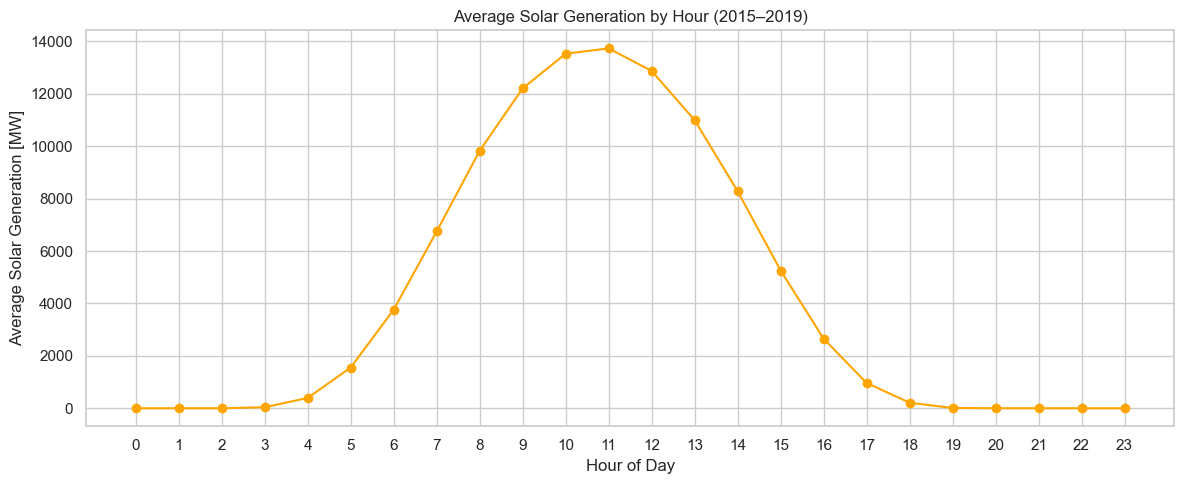

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the processed data
# Make sure the path to processed_data_de.csv is correct
df = pd.read_csv("../data/processed_data_de.csv", parse_dates=["utc_timestamp"])

# Set font and style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 5)

# Plot 1: Average solar generation by hour of the day
solar_by_hour = df.groupby("hour")["DE_solar_generation_actual"].mean()

plt.plot(solar_by_hour.index, solar_by_hour.values, marker='o', color='orange')
plt.title("Average Solar Generation by Hour (2015–2019)")
plt.xlabel("Hour of Day")
plt.ylabel("Average Solar Generation [MW]")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()






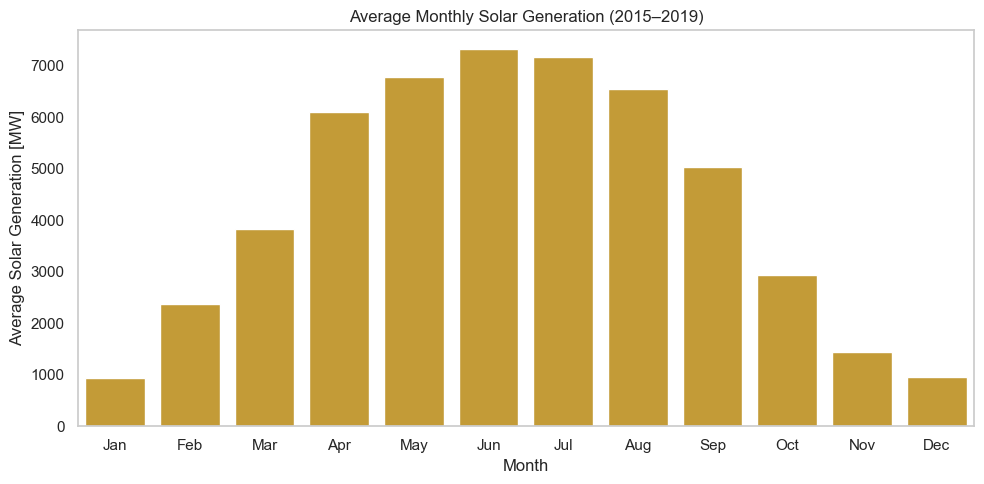

In [13]:
# Plot 2: Solarproduktion im Jahresverlauf (nach Monat)
# Gruppierung nach Monat und Mittelwertbildung
solar_by_month = df.groupby("month")["DE_solar_generation_actual"].mean()

# Darstellung
plt.figure(figsize=(10, 5))
sns.barplot(x=solar_by_month.index, y=solar_by_month.values, color="goldenrod")

plt.title("Average Monthly Solar Generation (2015–2019)")
plt.xlabel("Month")
plt.ylabel("Average Solar Generation [MW]")
plt.xticks(ticks=range(0, 12), labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun", 
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])
plt.grid(axis='y')
plt.tight_layout()
plt.show()


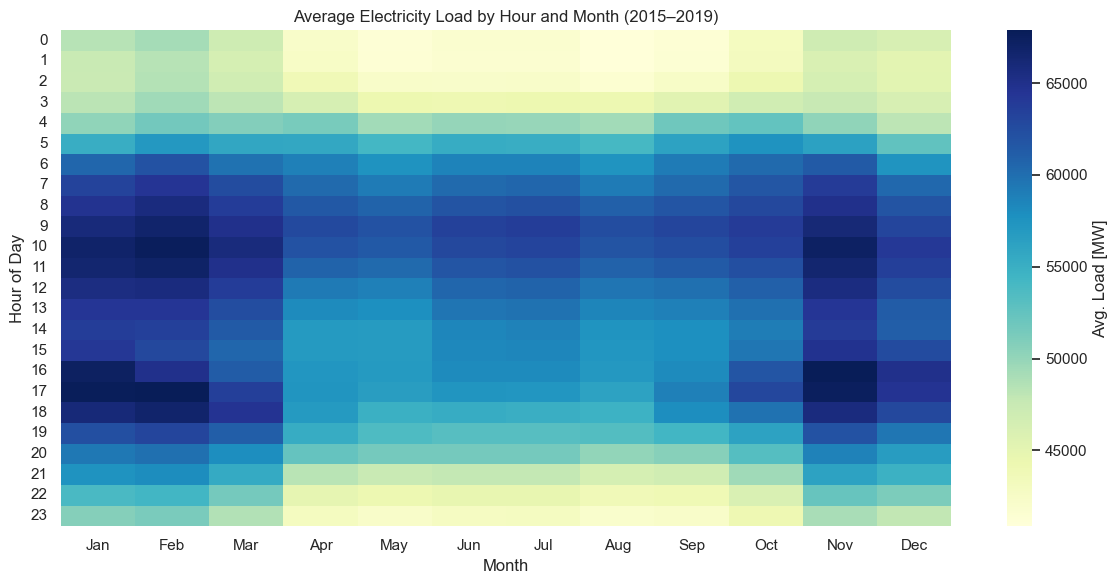

In [15]:
# Plot 3: Heatmap – Durchschnittlicher Stromverbrauch nach Stunde und Monat

# Pivot-Tabelle: Zeilen = Stunde, Spalten = Monat, Werte = Durchschnittlicher Verbrauch
heatmap_data = df.pivot_table(
    values="DE_load_actual_entsoe_transparency",
    index="hour",
    columns="month",
    aggfunc="mean"
)

# Darstellung
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=False, fmt=".0f", cbar_kws={"label": "Avg. Load [MW]"})

plt.title("Average Electricity Load by Hour and Month (2015–2019)")
plt.xlabel("Month")
plt.ylabel("Hour of Day")
plt.xticks(ticks=[i + 0.5 for i in range(12)], labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


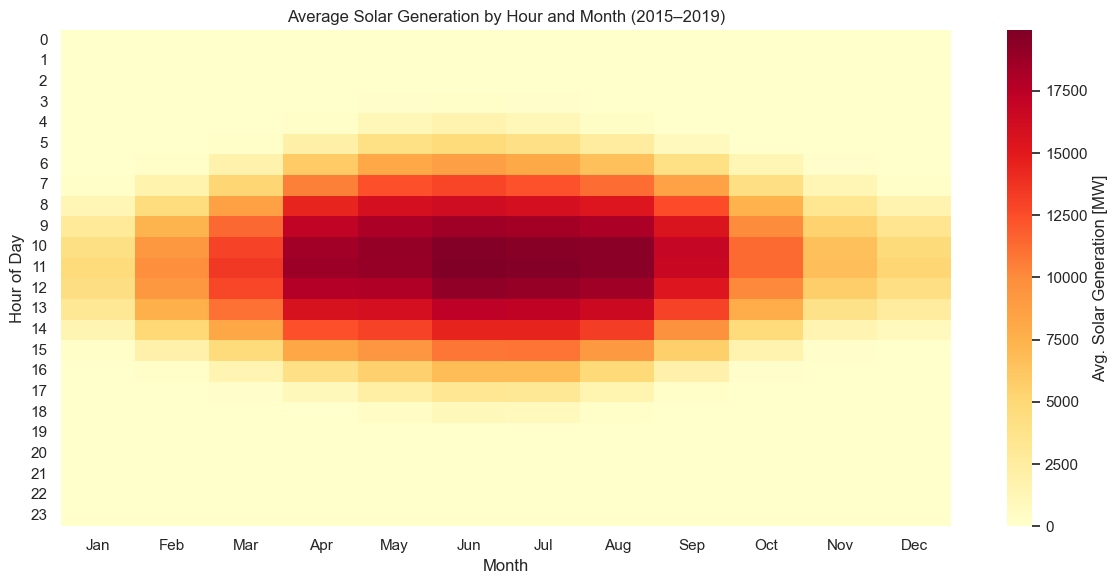

In [16]:
# Plot: Heatmap – Durchschnittliche Solarproduktion nach Stunde und Monat

# Pivot-Tabelle: Zeilen = Stunde, Spalten = Monat, Werte = Durchschnittliche Solarproduktion
solar_heatmap = df.pivot_table(
    values="DE_solar_generation_actual",
    index="hour",
    columns="month",
    aggfunc="mean"
)

# Darstellung
plt.figure(figsize=(12, 6))
sns.heatmap(solar_heatmap, cmap="YlOrRd", annot=False, fmt=".0f", cbar_kws={"label": "Avg. Solar Generation [MW]"})

plt.title("Average Solar Generation by Hour and Month (2015–2019)")
plt.xlabel("Month")
plt.ylabel("Hour of Day")
plt.xticks(ticks=[i + 0.5 for i in range(12)], labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


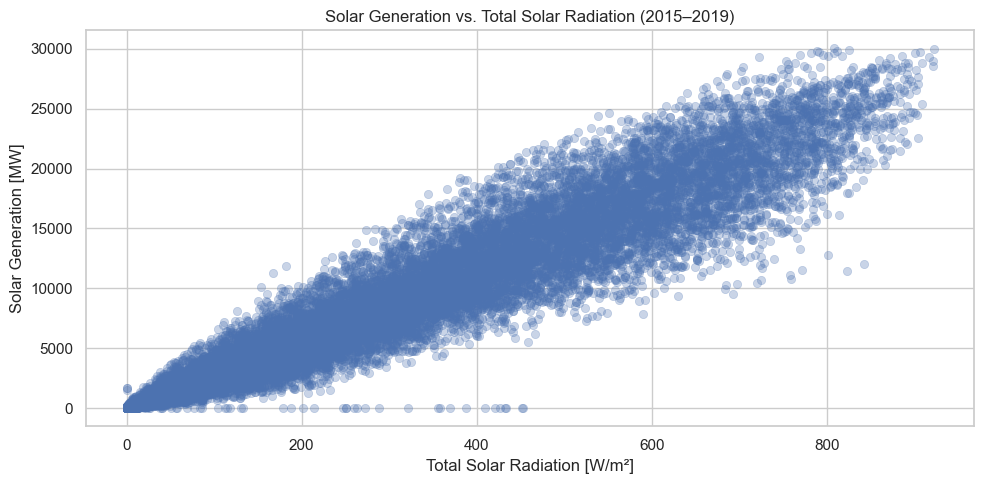

In [18]:
# Plot 4: Scatterplot – Solarproduktion vs. Gesamtstrahlung

# Streudiagramm erstellen
plt.figure(figsize=(10, 5))
sns.scatterplot(
    x="radiation_total",
    y="DE_solar_generation_actual",
    data=df,
    alpha=0.3,
    edgecolor=None
)

plt.title("Solar Generation vs. Total Solar Radiation (2015–2019)")
plt.xlabel("Total Solar Radiation [W/m²]")
plt.ylabel("Solar Generation [MW]")
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/tq/9nvqt2l90bvcrsjk_4877y_00000gn/T/ipykernel_7390/3754777755.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="holiday_label", y="DE_load_actual_entsoe_transparency", data=df,


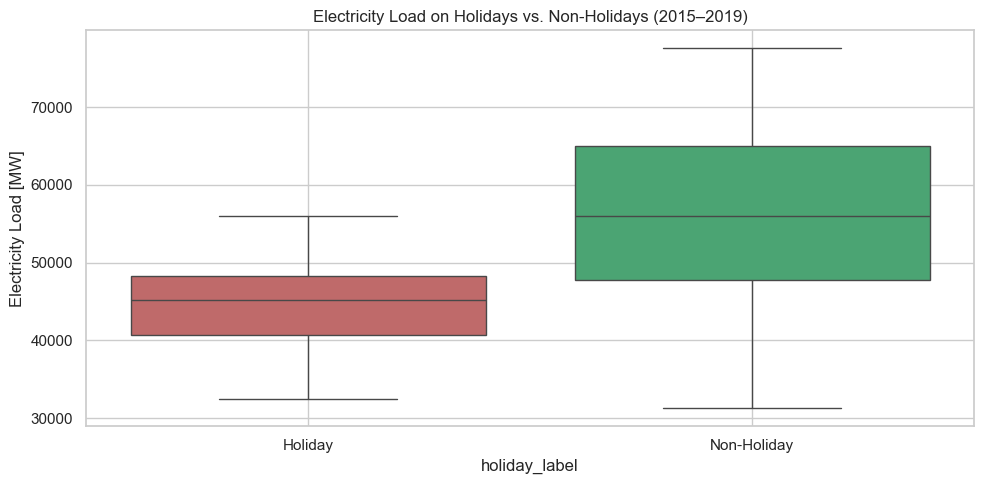

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df["holiday_label"] = df["is_holiday"].map({1: "Holiday", 0: "Non-Holiday"})

plt.figure(figsize=(10, 5))
sns.boxplot(x="holiday_label", y="DE_load_actual_entsoe_transparency", data=df,
            palette=["indianred", "mediumseagreen"], showfliers=False)

plt.ylabel("Electricity Load [MW]")
plt.title("Electricity Load on Holidays vs. Non-Holidays (2015–2019)")
plt.grid(True)
plt.tight_layout()
plt.show()




In [22]:
print(df["is_holiday"].value_counts())


is_holiday
0    42720
1     1104
Name: count, dtype: int64


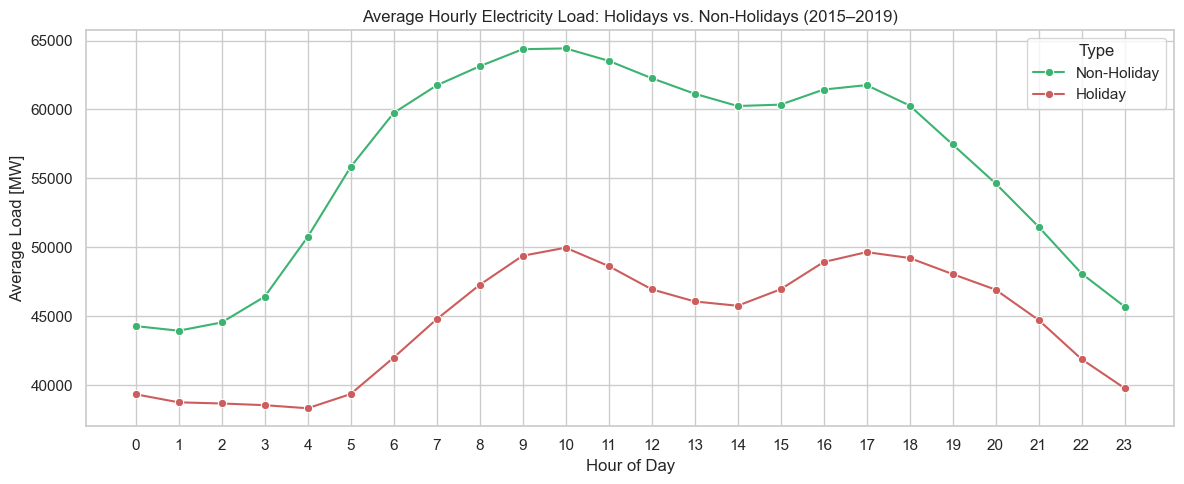

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gruppieren nach Stunde und Feiertagsstatus
avg_load_by_hour = df.groupby(["hour", "is_holiday"])["DE_load_actual_entsoe_transparency"].mean().reset_index()

# Feiertagslabel hinzufügen
avg_load_by_hour["Type"] = avg_load_by_hour["is_holiday"].map({0: "Non-Holiday", 1: "Holiday"})

# Plot
plt.figure(figsize=(12, 5))
sns.lineplot(data=avg_load_by_hour, x="hour", y="DE_load_actual_entsoe_transparency", hue="Type",
             palette=["mediumseagreen", "indianred"], marker="o")

plt.title("Average Hourly Electricity Load: Holidays vs. Non-Holidays (2015–2019)")
plt.xlabel("Hour of Day")
plt.ylabel("Average Load [MW]")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/tq/9nvqt2l90bvcrsjk_4877y_00000gn/T/ipykernel_7390/1065342741.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_load_by_temp = df.groupby(temp_bins)["DE_load_actual_entsoe_transparency"].mean()


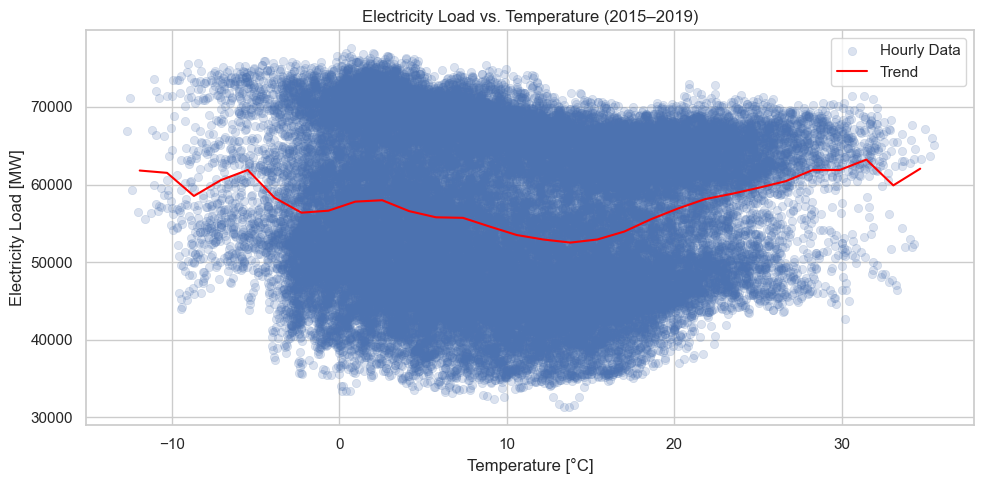

In [27]:
# Plot 1: Temperatur vs. Stromverbrauch (mit Trendlinie)

plt.figure(figsize=(10, 5))
sns.scatterplot(
    x="DE_temperature",
    y="DE_load_actual_entsoe_transparency",
    data=df,
    alpha=0.2,
    edgecolor=None,
    label="Hourly Data"
)

# Gleitender Mittelwert zur Glättung
temp_bins = pd.cut(df["DE_temperature"], bins=30)
avg_load_by_temp = df.groupby(temp_bins)["DE_load_actual_entsoe_transparency"].mean()
bin_centers = [interval.mid for interval in avg_load_by_temp.index]

plt.plot(bin_centers, avg_load_by_temp.values, color="red", label="Trend")

plt.title("Electricity Load vs. Temperature (2015–2019)")
plt.xlabel("Temperature [°C]")
plt.ylabel("Electricity Load [MW]")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/tq/9nvqt2l90bvcrsjk_4877y_00000gn/T/ipykernel_7390/3870278939.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="weekday_name", y="DE_load_actual_entsoe_transparency", data=df,


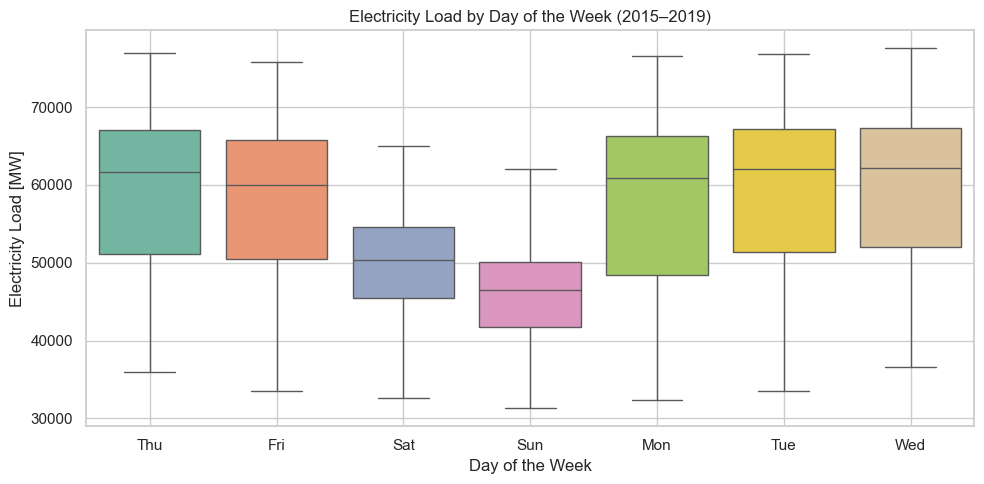

In [28]:
# Plot 2: Stromverbrauch nach Wochentag (Boxplot)

# Wochentagsnamen ergänzen
weekday_labels = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
df["weekday_name"] = df["weekday"].map(dict(enumerate(weekday_labels)))

plt.figure(figsize=(10, 5))
sns.boxplot(x="weekday_name", y="DE_load_actual_entsoe_transparency", data=df, 
            palette="Set2", showfliers=False)

plt.title("Electricity Load by Day of the Week (2015–2019)")
plt.xlabel("Day of the Week")
plt.ylabel("Electricity Load [MW]")
plt.grid(True)
plt.tight_layout()
plt.show()
